In [2]:
import numpy as np
import matplotlib.pyplot as plt


Shape: 0.45611880615246064, Loc: 0.0, Scale: 3256752.4774260116
10th percentile: $1,815,191.11
50th percentile: $3,256,752.48
80th percentile: $4,780,809.09


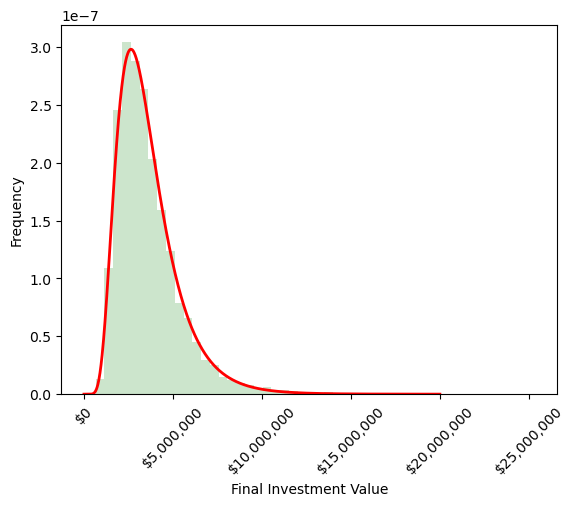

In [29]:

# Constants - These are based on historical S&P 500 data
AVERAGE_RETURN = 0.07  # This is the nominal return
INFLATION_RATE = 0.03  # This is the inflation rate
REAL_RETURN = AVERAGE_RETURN - INFLATION_RATE  # This is the real return, adjusted for inflation
STANDARD_DEVIATION = 0.20
NUM_SIMULATIONS = 10000
NUM_YEARS = 10
INITIAL_INVESTMENT = 1000000
MONTHLY_CONTRIBUTION = 14000


def simulate_investment(final_investment, num_years, real_return, standard_deviation, monthly_contribution):
    year = 0
    while year < num_years:
        for month in range(12):
            monthly_return = np.random.normal(real_return / 12, standard_deviation / np.sqrt(12))
            final_investment *= (1 + monthly_return)
            final_investment += monthly_contribution*(1+INFLATION_RATE)
        year += 1
    return final_investment

# Perform the simulations
simulations = []
for _ in range(NUM_SIMULATIONS):
    final_investment = simulate_investment(INITIAL_INVESTMENT, NUM_YEARS, REAL_RETURN, STANDARD_DEVIATION, MONTHLY_CONTRIBUTION)
    simulations.append(final_investment)


#fit an log normal distribution to the simulations data
from scipy.stats import lognorm
shape, loc, scale = lognorm.fit(simulations, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")
#calculate the 10th and 90th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

#graph the distribution on the simulations data
x = np.linspace(0, 20_000_000, 1000)
plt.hist(simulations, bins=50, density=True, alpha=0.2, color='g')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Investment Value')
plt.ylabel('Frequency')
#conver x axis to dolar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
#rotate x axis labels
plt.xticks(rotation=45)
plt.show()



In [19]:
 1225+1250+1450+1490+1350+1285+1395 


9445

In [25]:
(900900+640000)*.01


15409.0

## Rental simulations

Shape: 0.0417043376434424, Loc: 0.0, Scale: 2993591.3990980177
10th percentile: $2,837,795.57
50th percentile: $2,993,591.40
80th percentile: $3,100,529.98


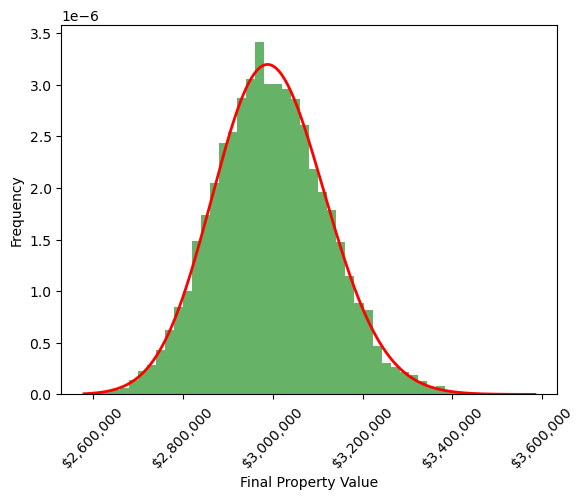

In [32]:
import numpy as np
import matplotlib.pyplot as plt



# Set initial values
initial_rent = 1225+1250+1450+1490+1350+1285+1395  # The initial monthly rent
avg_annual_rent_increase = 0.025  # The expected average annual rent increase
std_dev_rent_increase = 0.01  # Standard deviation of rent increase
annual_maintenance_cost_rate = 0.01  # Annual maintenance cost as a percentage of property value
property_value = 900900+640000  # Initial property value
avg_property_appreciation = 0.04  # Average annual property appreciation
std_dev_property_appreciation = 0.015  # Standard deviation of property appreciation
vacancy_rate = 0.1  # Expected vacancy rate
tax_rate = 0.3  # Tax rate on rental income
inflation_rate = INFLATION_RATE  # The expected annual inflation rate
years = 10  # The number of years for the projection
num_simulations = 10000  # Number of Monte Carlo simulations


def simulate_property_value_and_income(property_value, annual_rent, num_years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate):
    year = 0
    while year < num_years:
        for month in range(12):
            # Simulate the monthly rent increase
            monthly_rent_increase = np.random.normal(avg_annual_rent_increase / 12, std_dev_rent_increase / np.sqrt(12))
            annual_rent *= (1 + monthly_rent_increase)

            # Calculate the monthly maintenance cost
            monthly_maintenance_cost = property_value * annual_maintenance_cost_rate / 12

            # Calculate the net monthly income
            net_monthly_income = annual_rent * (1 - vacancy_rate) / 12 - monthly_maintenance_cost

            # Apply tax
            net_monthly_income_after_tax = net_monthly_income * (1 - tax_rate)

            # Adjust for inflation and add to the property value
            property_value += net_monthly_income_after_tax / ((1 + inflation_rate) ** (year + month / 12))

            # Simulate the monthly property appreciation
            monthly_property_appreciation = np.random.normal(avg_property_appreciation / 12, std_dev_property_appreciation / np.sqrt(12))
            property_value *= (1 + monthly_property_appreciation)
        
        year += 1

    return property_value

# Perform the simulations
simulations = []
for _ in range(num_simulations):
    final_property_value = simulate_property_value_and_income(property_value, initial_rent * 12, years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate)
    simulations.append(final_property_value)

# Fit a log normal distribution to the simulations data
shape, loc, scale = lognorm.fit(simulations, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")

# Calculate the 10th, 50th, and 80th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

# Graph the distribution on the simulations data
x = np.linspace(min(simulations), max(simulations), 1000)
plt.hist(simulations, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Property Value')
plt.ylabel('Frequency')

# Convert x axis to dollar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Rotate x axis labels
plt.xticks(rotation=45)
plt.show()



Combine simulations

Shape: 0.24474821754835857, Loc: 0.0, Scale: 6395203.872960267
10th percentile: $4,673,418.67
50th percentile: $6,395,203.87
80th percentile: $7,858,011.71


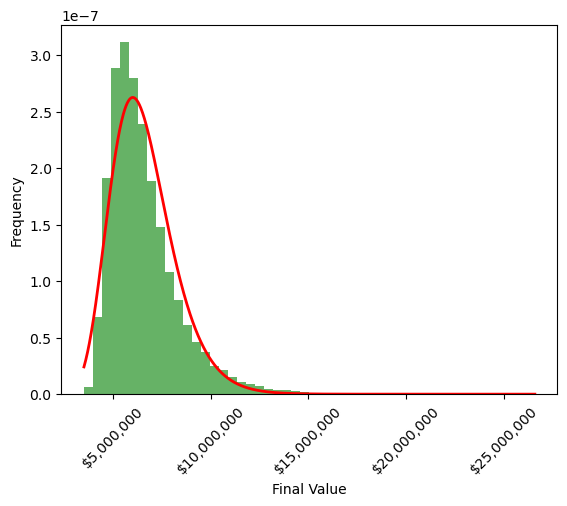

In [33]:

# Perform the simulations
total_sims = []
for _ in range(50000):
    final_property_value = simulate_property_value_and_income(property_value, initial_rent * 12, years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate)
    final_investment = simulate_investment(INITIAL_INVESTMENT, NUM_YEARS, REAL_RETURN, STANDARD_DEVIATION, MONTHLY_CONTRIBUTION)
    total_sims.append(final_investment+final_property_value)

# Fit a log normal distribution to the simulations data
shape, loc, scale = lognorm.fit(total_sims, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")

# Calculate the 10th, 50th, and 80th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

# Graph the distribution on the simulations data
x = np.linspace(min(total_sims), max(total_sims), 1000)
plt.hist(total_sims, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Value')
plt.ylabel('Frequency')

# Convert x axis to dollar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Rotate x axis labels
plt.xticks(rotation=45)
plt.show()
